# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
!pwd

/home/madigun/Drives/DEV/Kyle/private_study/Udacity/Deep Learning Nano Degree/3. Convolutional Neural Networks/Project 2. Dog Breed Classifier


In [2]:
# !wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
# !wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip

In [3]:
# !unzip dogImages.zip
# !unzip lfw.zip

In [4]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


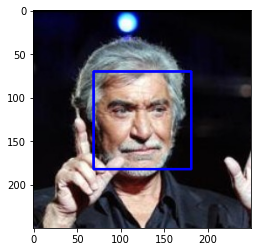

In [5]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [6]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

[How to use `tqdm` library](https://tariat.tistory.com/421)

In [7]:
from tqdm import tqdm
import time

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

def human_detector(data):
    detection_cnt = 0
    total_cnt = len(data)
    for path in data:
        detection_cnt += face_detector(path)
    
    print('Human face detection ratio is %.2f%%(%d/%d)' % ((detection_cnt / total_cnt) * 100, detection_cnt, total_cnt))
    
human_detector(human_files_short)
human_detector(dog_files_short)

Human face detection ratio is 98.00%(98/100)
Human face detection ratio is 11.00%(11/100)


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [8]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [9]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [10]:
import os 

from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    image = transforms.ToTensor()(Image.open(img_path))
    image = image.view(1, *image.shape)
    
    with torch.no_grad():
        if use_cuda:
            pred = VGG16(image.cuda())
        else:
            pred = VGG16(image)
        
    return torch.argmax(pred) # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [11]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    return True if 151 <= VGG16_predict(img_path) <= 268 else False# true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [12]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
def dog_detection_function(data):
    detection_cnt = 0
    total_cnt = len(data)
    for path in tqdm(data):
        detection_cnt += dog_detector(path)
        
    print('Dog detection ratio is %.2f%%(%d/%d)' % ((detection_cnt / total_cnt) * 100, detection_cnt, total_cnt))
    
dog_detection_function(human_files_short)
dog_detection_function(dog_files_short)

100%|██████████| 100/100 [00:00<00:00, 114.24it/s]


Dog detection ratio in human_files_short is 0.00%


100%|██████████| 100/100 [00:04<00:00, 21.19it/s]

Dog detection ratio in dog_files_short is 0.00%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [13]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

* Minimum width and height in dataset images

In [53]:
print('Minimum width is %d, Minimum height is %d' % (np.min([Image.open(dog).size[0] for dog in dog_files]), np.min([Image.open(dog).size[1] for dog in dog_files])))

Minimum width is 105, Minimum height is 113


In [56]:
total_data_cnt = len(dog_files)
for size in [512, 256, 128]:
    width_cnt = len([Image.open(dog).size[0] for dog in dog_files if Image.open(dog).size[0] < size])
    height_cnt = len([Image.open(dog).size[1] for dog in dog_files if Image.open(dog).size[1] < size])
    print('The number of images whose width under %d is %d(%.2f%%)' % (size, width_cnt, (width_cnt / total_data_cnt * 100)))
    print('The number of images whose heigh under %d is %d(%.2f%%)' % (size, height_cnt, (height_cnt / total_data_cnt * 100)))

The number of images whose width under 512 is 5233(62.66%)
The number of images whose heigh under 512 is 5673(67.93%)
The number of images whose width under 256 is 425(5.09%)
The number of images whose heigh under 256 is 327(3.92%)
The number of images whose width under 128 is 6(0.07%)
The number of images whose heigh under 128 is 4(0.05%)


In [57]:
small_image_cnt = len([dog for dog in dog_files if Image.open(dog).size[0] < 256 and Image.open(dog).size[1] < 256])
print('The number of samll images(under 256x256) is %d(%.2f%%)' % (small_image_cnt, (small_image_cnt / total_data_cnt * 100)))

The number of samll images(under 256x256) is 171(2.05%)


In [12]:
import os, torch
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size = 20

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

other_transform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(('dogImages/train/'), transform=train_transform)
valid_data = datasets.ImageFolder(('dogImages/valid/'), transform=other_transform)
test_data = datasets.ImageFolder(('dogImages/test/'), transform=other_transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

I've made the input tensor whose size is 224x224. The first reason is the original size. In this project, the original dog image size varies. The smallest image size is 105x120. There is a small portion of data whose size is under 256x256(only about 2%).  And a couple of famous image classification models resize 256x256 and crop to 224x224. Because of those reasons, I picked 224x224 as the input tensor's size.

And I've applied the `RandomHorizontalFlip` and `RandomRotation` with 10 degrees for the train dataset. These data augmentation techniques help our model avoid overfitting. Because of that, I've applied these techniques for only train dataset. Instead, I've just applied the resizing for valid and test dataset. In normalization to reduce computation time, I've applied to every dataset (train/valid/test). Means applied for each color channel are [0.485, 0.456, 0.406] and the standard deviations are [0.229, 0.224, 0.225]. 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [13]:
dog_classes = [l.split('.')[1] for l in sorted(os.listdir('dogImages/train/'))]
len(dog_classes)

133

In [14]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1) # after maxpooing, 224 -> 112
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1) # after maxpooing, 112 -> 56
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1) # after maxpooing, 56 -> 28
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1) # after maxpooing, 28 -> 14
        self.conv5 = nn.Conv2d(256, 512, 3, padding=1) # after maxpooing, 14 -> 7
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(512*7*7, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 133)
        
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        
        x = F.relu(self.conv5(x))
        x = self.pool(x)

        x = x.view(-1, 512*7*7)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [15]:
model_scratch

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

My network has five convolutional layers and three fully connected layers.<br>
Each convolutional layer uses 3x3 kernels with padding(size 1), and the relu function as an activation function.<br>
After the convolutional layer, the network moves to max-pooling layers(size 2).

Each fully connected layer uses the relu function as an activation function (without the last layer).<br>
And before the fully connected layer, the network moves to dropout its 30% of parameters.

When I tried to create a scratch model, I used only three convolutional layers. The result is too bad to accept (under 10% test accuracy).<br>
And I tried to modify the out channels and fully connected layers' out features, but I didn't get the satisfying results.

So, I made the scratch model deeper to add the convolutional layer.

```

(conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 -- ReLU -- 
(pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

(conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 -- ReLU -- 
(pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

(conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 -- ReLU -- 
(pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

(conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 -- ReLU -- 
(pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

(conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 -- ReLU -- 
(pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

(dropout): Dropout(p=0.3, inplace=False)
 -- ReLU -- 
(fc1): Linear(in_features=25088, out_features=1024, bias=True)

(dropout): Dropout(p=0.3, inplace=False)
 -- ReLU -- 
(fc2): Linear(in_features=1024, out_features=512, bias=True)

(dropout): Dropout(p=0.3, inplace=False)
 -- ReLU -- 
(fc3): Linear(in_features=512, out_features=133, bias=True)

```

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [16]:
import torch.optim as optim
from torch import nn

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [17]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
import time
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        start = time.time()        
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

    # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        print('Time consumed %.4f seconds' % (time.time() - start))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Valid loss decreased (%.6f --> %.6f).' % (valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

# train the model
model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [ ]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [24]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [19]:
## TODO: Specify data loaders
batch_size = 20

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

other_transform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(('dogImages/train/'), transform=train_transform)
valid_data = datasets.ImageFolder(('dogImages/valid/'), transform=other_transform)
test_data = datasets.ImageFolder(('dogImages/test/'), transform=other_transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

dog_classes = [l.split('.')[1] for l in sorted(os.listdir('dogImages/train/'))]

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [29]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
VGG16 = models.vgg16(pretrained=True)
VGG19 = models.vgg19(pretrained=True)
RESNET50 = models.resnet50(pretrained=True)

transfer_models = {'vgg16': VGG16, 'vgg19': VGG19, 'resnet50': RESNET50}

for name, model in transfer_models.items():
    for param in model.parameters():
        param.requires_grad = False

In [30]:
for model in transfer_models:
    if 'vgg' in model:
        transfer_models[model].classifier = nn.Sequential(
            nn.Linear(transfer_models[model].classifier[0].in_features, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, len(dog_classes))
        )
    elif 'resnet' in model:
        transfer_models[model].fc = nn.Linear(transfer_models[model].fc.in_features, len(dog_classes))

In [31]:
for model_name, model_transfer in transfer_models.items():
    print('------------------ %s ------------------\n' % model_name)
    criterion_transfer = nn.CrossEntropyLoss()
    optimizer_transfer = optim.Adam(model_transfer.parameters(), lr=0.001)
    
    if use_cuda:
        model_transfer = model_transfer.cuda()
        
    model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'transfer_test_%s.pt' % model_name)
    
    model_transfer.load_state_dict(torch.load('transfer_test_%s.pt' % model_name))
    
    test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

------------------ vgg16 ------------------

Epoch: 1 	Training Loss: 4.795819 	Validation Loss: 3.395601
Time consumed 53.2914 seconds
Valid loss decreased (inf --> 3.395601).
Epoch: 2 	Training Loss: 4.036468 	Validation Loss: 2.686078
Time consumed 53.4442 seconds
Valid loss decreased (3.395601 --> 2.686078).
Epoch: 3 	Training Loss: 3.730296 	Validation Loss: 2.576606
Time consumed 53.9188 seconds
Valid loss decreased (2.686078 --> 2.576606).
Epoch: 4 	Training Loss: 3.594084 	Validation Loss: 2.436417
Time consumed 53.5962 seconds
Valid loss decreased (2.576606 --> 2.436417).
Epoch: 5 	Training Loss: 3.524971 	Validation Loss: 2.417749
Time consumed 53.5310 seconds
Valid loss decreased (2.436417 --> 2.417749).
Epoch: 6 	Training Loss: 3.446952 	Validation Loss: 2.268544
Time consumed 53.5770 seconds
Valid loss decreased (2.417749 --> 2.268544).
Epoch: 7 	Training Loss: 3.409003 	Validation Loss: 2.137616
Time consumed 53.6160 seconds
Valid loss decreased (2.268544 --> 2.137616).
E

In [43]:
model_transfer = models.resnet50(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.fc = nn.Linear(model_transfer.fc.in_features, len(dog_classes))

if use_cuda:
    model_transfer = model_transfer.cuda()

In [44]:
model_transfer

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I tried to use famous image classification models such as `VGG16`, `VGG19`, and `Resnet50`. To choose the best one, I ran these models for 10 epochs and compared their results.

First of all, I loaded three models using the `torchvision` library. And replace the last layers (the group of fully connected layers named classifier in the `VGG16` and `VGG19` and the single fully connected layer in the `Resnet50`) with new layers that I made. I kept the original structure of layers, and I change the final output layer's output size. These models target the ImageNet classification for 1,000 classes, so I replace the output size into 133 classes for our purpose.

The results of 10 epochs for each model follow:
>	[VGG16] Test Loss: 2.146924, Test Accuracy: 39% (329/836)<br>
>	[VGG19] Test Loss: 2.086552, Test Accuracy: 41% (345/836)<br>
>	[Resnet50] Test Loss: 1.119281, Test Accuracy: 72% (603/836)

So, I choose `Resnet50` as my transfer model. And I ran the model for 30 epochs. The following is the result:
>	Test Loss: 1.025232<br>
>	Test Accuracy: 72% (607/836)

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [45]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [46]:
# train the model
model_transfer = train(30, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.708710 	Validation Loss: 1.298824
Time consumed 54.8730 seconds
Valid loss decreased (inf --> 1.298824).
Epoch: 2 	Training Loss: 1.456119 	Validation Loss: 1.123389
Time consumed 54.7067 seconds
Valid loss decreased (1.298824 --> 1.123389).
Epoch: 3 	Training Loss: 1.266886 	Validation Loss: 1.037867
Time consumed 54.5945 seconds
Valid loss decreased (1.123389 --> 1.037867).
Epoch: 4 	Training Loss: 1.156932 	Validation Loss: 1.015206
Time consumed 54.9493 seconds
Valid loss decreased (1.037867 --> 1.015206).
Epoch: 5 	Training Loss: 1.181171 	Validation Loss: 1.008200
Time consumed 55.0567 seconds
Valid loss decreased (1.015206 --> 1.008200).
Epoch: 6 	Training Loss: 1.114004 	Validation Loss: 0.994603
Time consumed 54.9874 seconds
Valid loss decreased (1.008200 --> 0.994603).
Epoch: 7 	Training Loss: 1.098457 	Validation Loss: 1.038846
Time consumed 54.9836 seconds
Epoch: 8 	Training Loss: 1.057276 	Validation Loss: 1.018049
Time consumed 55.0539 seconds
E

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [47]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.025232


Test Accuracy: 72% (607/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [116]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
# class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
class_names = [l.split('.')[1] for l in sorted(os.listdir('dogImages/train/'))]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    input_img = transforms.Compose([
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                ])(Image.open(img_path))
    
    if torch.cuda.is_available():
        input_img = input_img.cuda()
        
    output = model_transfer(input_img.view(1, *input_img.size()))
    output_prob = F.softmax(output, dim=1)
        
    return class_names[torch.argmax(output_prob)]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [131]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

dog_detect_model = models.vgg16(pretrained=True)
if use_cuda:
    dog_detect_model = dog_detect_model.cuda()
    
def human_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    
    return len(faces) > 0

def dog_detector(img_path):
    image = transforms.ToTensor()(Image.open(img_path))
    image = image.view(1, *image.shape)
    
    with torch.no_grad():
        pred = dog_detect_model(image.cuda()) if use_cuda else dog_detect_model(image)
        
    return True if 151 <= torch.argmax(pred) <= 268 else False

def species_detector(img_path):
    if human_detector(img_path):
        return 'human'
    elif dog_detector(img_path):
        return 'dog'
    else:
        return 'unknown'

def run_app(img_path):
    species = species_detector(img_path)
    if species in ['human', 'dog']:
        print('Hello, %s' % species)
        print('You look like a ...' if species == 'human' else 'Your predicted breed is ...')
        print(predict_breed_transfer(img_path))
    else:
        print("Sorry, I can't recognize who you are")
    plt.imshow(Image.open(img_path))
    plt.show()

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

* Replace Resnet50 with the state-of-arts model like `FixEfficientNet-L2`. It's the easiest way to improve model performance to use a more accurate model.
* Replace face detection model with the state-of-arts model like `DeepFace`. The current face detection model is not good enough to detect a human in the picture.
* There is no way to separate human objects and dog objects. Although there is a picture with both humans and dogs, the model returns one of them; human or dog. Of course, there is a way to return human, dog, or human and dog. However, the model cannot predict the breed for each object. If we want to improve this model, we have to insert the object detection model and return a predicted breed for each object.

Hello, human
You look like a ...
American_water_spaniel


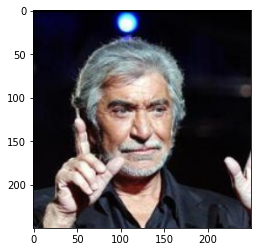

Hello, human
You look like a ...
Dogue_de_bordeaux


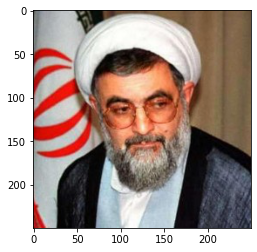

Hello, human
You look like a ...
Havanese


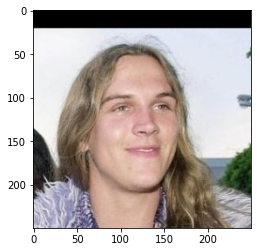

Hello, dog
Your predicted breed is ...
Cardigan_welsh_corgi


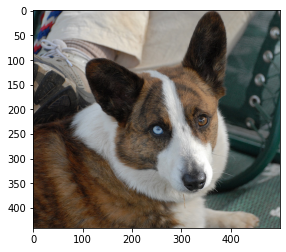

Hello, dog
Your predicted breed is ...
Cardigan_welsh_corgi


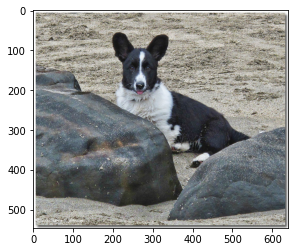

Hello, dog
Your predicted breed is ...
Cardigan_welsh_corgi


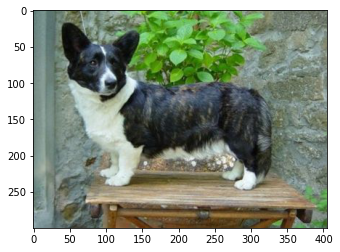

In [132]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

In [146]:
human_detector('./sample_images/guerrero-e1531950483962.jpg')

True

Thinking-of-getting-a-cat.png
Sorry, I can't recognize who you are


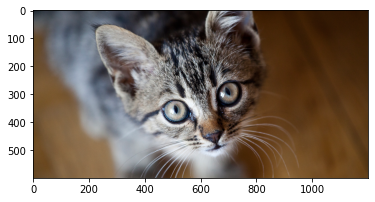

a0001799_main.jpg
Hello, human
You look like a ...
Akita


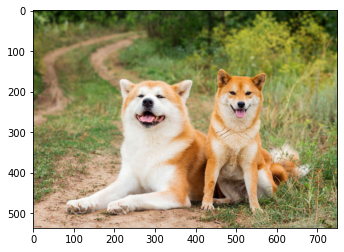

joe-biden-ukraine-fundraising.jpg
Hello, human
You look like a ...
Dogue_de_bordeaux


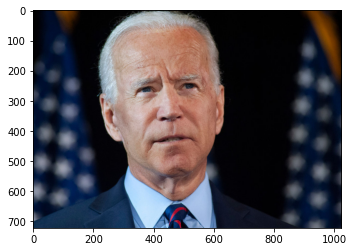

guerrero-e1531950483962.jpg
Hello, human
You look like a ...
Cane_corso


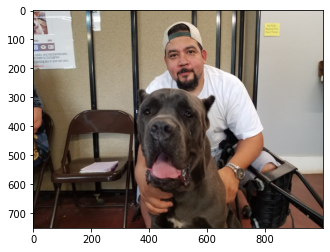

0-800-.jpg
Sorry, I can't recognize who you are


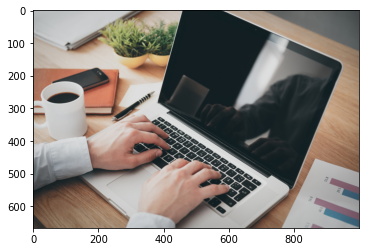

images.jpg
Sorry, I can't recognize who you are


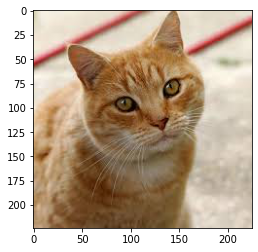

images-3.jpg
Hello, dog
Your predicted breed is ...
English_cocker_spaniel


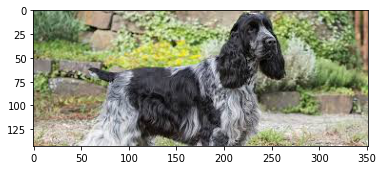

images-1.jpg
Sorry, I can't recognize who you are


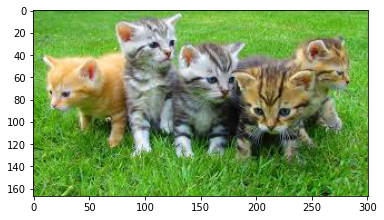

https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5babef3da7ea4342a948c024%2F0x0.jpg
Hello, human
You look like a ...
Poodle


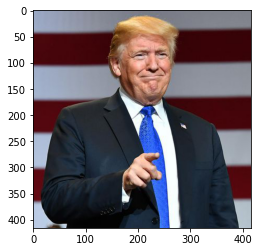

images-2.jpg
Hello, dog
Your predicted breed is ...
Cocker_spaniel


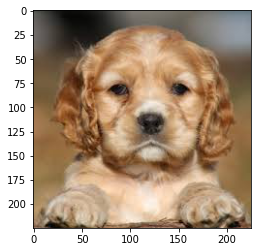

ryan-reynolds.jpg
Hello, human
You look like a ...
Dogue_de_bordeaux


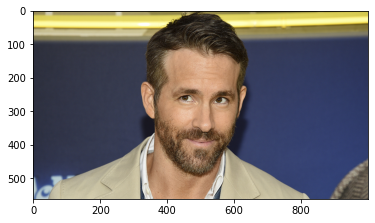

iphone-11-pro-review-2-500x500.jpg
Sorry, I can't recognize who you are


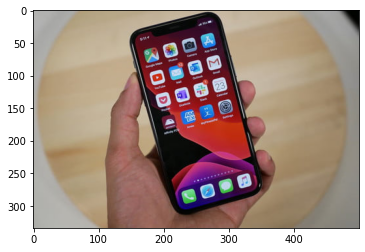

In [147]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in os.listdir('./sample_images/'):
    if file.split('.')[-1] in ['jpg', 'png']:
        print(file)
        run_app('./sample_images/%s' % file)